# Chemical similairty across compound library

### Import modules

In [1]:
import pandas as pd
from tqdm import tqdm
import rdkit
from rdkit import RDLogger
from rdkit.Chem import PandasTools

tqdm.pandas()

In [2]:
import warnings

warnings.simplefilter("ignore")
RDLogger.DisableLog("rdApp.*")  # suppress rdkit warnings

# Load compounds libraries

* Enamine - https://enamine.net/ (Login required)
* ReFRAMEDB - https://reframedb.org/ (Open source)
* COCONUT - https://coconut.naturalproducts.net/ (Open source)

In [3]:
enamine_df = pd.read_excel(
    "../data/library/Enamine_smiles.xlsx",
    engine="openpyxl",
)
enamine_df.drop_duplicates(subset="ID", inplace=True)


enamine_df.head(1)

,ID,Smile,Name,Molecule (Canonical)
0,Z840028898,CS(=O)(=O)NCCCN(CC1=CC=CO1)C2CCCC2,N-{3-[cyclopentyl(furan-2-ylmethyl)amino]propy...,CS(=O)(=O)NCCCN(Cc1ccco1)C1CCCC1


In [4]:
reframe_df = pd.read_csv("../data/library/reframe_smiles_list.csv")
reframe_df.drop_duplicates(subset="calibr_id", inplace=True)
reframe_df.head(1)

,calibr_id,rfm_id,smile,canonical_ikey,name,source,source_id,status,reframedb_url
0,CBR-001-574-225-3,RFM-003-021-7,COc1cc2ncnc(Oc3cccc(NC(=O)Nc4cc(C(C)(C)C(F)(F)...,DKNUPRMJNUQNHR,RXDX-105,Selleck Chemicals,S8015,plated and available for follow-up,"=HYPERLINK(""https://reframedb.org//compound_da..."


In [5]:
# Remove molecules with no smiles
reframe_df = reframe_df[reframe_df["smile"] != "failed smile to can smile conversion"]

In [6]:
# time consuming
coconut_df = PandasTools.LoadSDF(
    "../data/library/COCONUT_DB.sdf"
)
coconut_df.drop_duplicates(subset="coconut_id", inplace=True)
coconut_df.head(1)

,coconut_id,inchi,inchikey,SMILES,sugar_free_smiles,molecular_formula,molecular_weight,citationDOI,textTaxa,name,...,number_of_rings,total_atom_number,bond_count,found_in_databases,murko_framework,alogp,apol,topoPSA,ID,ROMol
1,CNP0000002,InChI=1S/C27H36N2O15S/c1-5-12(29-9-45)26(37)44...,FJEMIESGEMWDOB-UHFFFAOYSA-N,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,O=C(O)C=1C(=O)C(O)CC(=O)C1N,C27H36N2O15S,660.6463016716552,[],[notax],5-{6-[(acetyloxy)methyl]-3-hydroxy-4-[(5-hydro...,...,,81,47,[chemspidernp],C1=CCCCC1,-2.4338000000000015,88.65454800000002,298.83,,<rdkit.Chem.rdchem.Mol object at 0x00000158472...


In [7]:
nd_compounds = pd.read_csv("../data/ntd_drugs.tsv", sep="\t")
nd_compounds.drop_duplicates(subset=["chembl_id"], inplace=True)
nd_compounds.head(2)

,chembl_id,pref_name,canonical_smiles,standard_inchi,standard_inchi_key,max_phase,indication_class,withdrawn_flag,black_box_warning,drugind_id,max_phase_for_ind,mesh_id,mesh_heading,ref_type,ref_id,ref_url
0,CHEMBL1200689,NITRIC OXIDE,[N]=O,InChI=1S/NO/c1-2,MWUXSHHQAYIFBG-UHFFFAOYSA-N,4.0,NaN,0,0,23580,3.0,D016773,"Leishmaniasis, Cutaneous",ClinicalTrials,NCT00317629,https://clinicaltrials.gov/ct2/results?id=%22N...
1,CHEMBL131,PREDNISOLONE,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[...,InChI=1S/C21H28O5/c1-19-7-5-13(23)9-12(19)3-4-...,OIGNJSKKLXVSLS-VWUMJDOOSA-N,4.0,Glucocorticoid,0,0,24801,2.0,D007918,Leprosy,ClinicalTrials,"NCT00919542,NCT00919776,NCT00919815",https://clinicaltrials.gov/ct2/results?id=%22N...


# Case 1: Miltefosine (13 fatty acid chain)

In [8]:
nd_compounds[nd_compounds["pref_name"] == "MILTEFOSINE"]

,chembl_id,pref_name,canonical_smiles,standard_inchi,standard_inchi_key,max_phase,indication_class,withdrawn_flag,black_box_warning,drugind_id,max_phase_for_ind,mesh_id,mesh_heading,ref_type,ref_id,ref_url
5,CHEMBL125,MILTEFOSINE,CCCCCCCCCCCCCCCCOP(=O)([O-])OCC[N+](C)(C)C,InChI=1S/C21H46NO4P/c1-5-6-7-8-9-10-11-12-13-1...,PQLXHQMOHUQAKB-UHFFFAOYSA-N,4.0,NaN,0,1,40826,4.0,D007898,"Leishmaniasis, Visceral",ClinicalTrials,"NCT00370825,NCT00371995,NCT00696969,NCT0106744...",https://clinicaltrials.gov/ct2/results?id=%22N...


In [9]:
milefosin_drug = rdkit.Chem.MolFromSmiles(
    nd_compounds[nd_compounds["pref_name"] == "MILTEFOSINE"]["canonical_smiles"].values[
        0
    ]
)

In [10]:
# Compound tanimoto similarity for miltefosine
enamine_df["tanimoto_miltefosine"] = enamine_df["Smile"].progress_apply(
    lambda x: rdkit.DataStructs.FingerprintSimilarity(
        rdkit.Chem.RDKFingerprint(milefosin_drug),
        rdkit.Chem.RDKFingerprint(rdkit.Chem.MolFromSmiles(x)),
    )
)

100%|██████████| 200057/200057 [11:07<00:00, 299.68it/s]


In [11]:
reframe_df["tanimoto_miltefosine"] = reframe_df["smile"].progress_apply(
    lambda x: rdkit.DataStructs.FingerprintSimilarity(
        rdkit.Chem.RDKFingerprint(milefosin_drug),
        rdkit.Chem.RDKFingerprint(rdkit.Chem.MolFromSmiles(x)),
    )
)

100%|██████████| 12782/12782 [01:03<00:00, 199.95it/s]


In [12]:
coconut_df["tanimoto_miltefosine"] = coconut_df["SMILES"].progress_apply(
    lambda x: rdkit.DataStructs.FingerprintSimilarity(
        rdkit.Chem.RDKFingerprint(milefosin_drug),
        rdkit.Chem.RDKFingerprint(rdkit.Chem.MolFromSmiles(x)),
    )
)

100%|██████████| 406924/406924 [52:10<00:00, 130.00it/s] 


# Visualize Tanimoto distribution

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

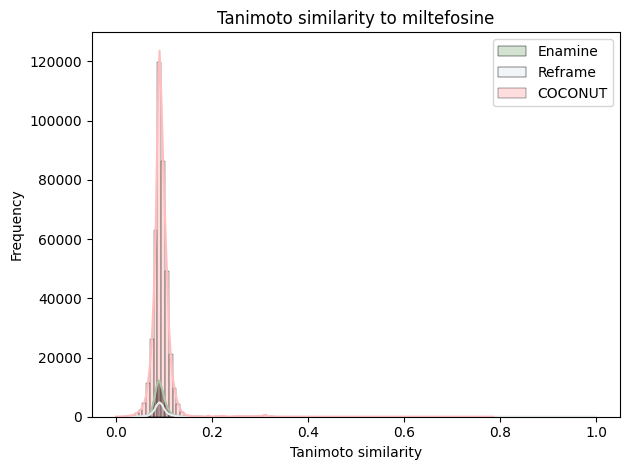

In [16]:
sns.histplot(
    enamine_df["tanimoto_miltefosine"],
    kde=True,
    bins=100,
    color="#abc6a6",
    alpha=0.5,
    label="Enamine",
)
sns.histplot(
    reframe_df["tanimoto_miltefosine"],
    kde=True,
    bins=100,
    color="#e7ecf0",
    alpha=0.5,
    label="Reframe",
)
sns.histplot(
    coconut_df["tanimoto_miltefosine"],
    kde=True,
    bins=100,
    color="#ffbdbe",
    alpha=0.5,
    label="COCONUT",
)
plt.xlabel("Tanimoto similarity")
plt.ylabel("Frequency")
plt.legend()
plt.title("Tanimoto similarity to miltefosine")
plt.tight_layout()
plt.savefig("../figures/tanimoto_miltefosine.jpg", dpi=400)
plt.show()

# Case 2: Streptomycin

In [17]:
nd_compounds[nd_compounds["pref_name"] == "STREPTOMYCIN"]

,chembl_id,pref_name,canonical_smiles,standard_inchi,standard_inchi_key,max_phase,indication_class,withdrawn_flag,black_box_warning,drugind_id,max_phase_for_ind,mesh_id,mesh_heading,ref_type,ref_id,ref_url
60,CHEMBL372795,STREPTOMYCIN,CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@H]3[C@H](O)[C@...,"InChI=1S/C21H39N7O12/c1-5-21(36,4-30)16(40-17-...",UCSJYZPVAKXKNQ-HZYVHMACSA-N,4.0,Antibacterial (tuberculostatic),0,1,141214,2.0,D054312,Buruli Ulcer,ClinicalTrials,NCT01659437,https://clinicaltrials.gov/ct2/results?id=%22N...


In [18]:
streptomycin_drug = rdkit.Chem.MolFromSmiles(
    nd_compounds[nd_compounds["pref_name"] == "STREPTOMYCIN"]["canonical_smiles"].values[
        0
    ]
)

In [19]:
# Compound tanimoto similarity for miltefosine
enamine_df["tanimoto_streptomycin"] = enamine_df["Smile"].progress_apply(
    lambda x: rdkit.DataStructs.FingerprintSimilarity(
        rdkit.Chem.RDKFingerprint(streptomycin_drug),
        rdkit.Chem.RDKFingerprint(rdkit.Chem.MolFromSmiles(x)),
    )
)

  0%|          | 0/200057 [00:00<?, ?it/s]

100%|██████████| 200057/200057 [25:40<00:00, 129.90it/s]


In [20]:
reframe_df["tanimoto_streptomycin"] = reframe_df["smile"].progress_apply(
    lambda x: rdkit.DataStructs.FingerprintSimilarity(
        rdkit.Chem.RDKFingerprint(streptomycin_drug),
        rdkit.Chem.RDKFingerprint(rdkit.Chem.MolFromSmiles(x)),
    )
)

100%|██████████| 12782/12782 [02:18<00:00, 92.57it/s] 


In [21]:
coconut_df["tanimoto_streptomycin"] = coconut_df["SMILES"].progress_apply(
    lambda x: rdkit.DataStructs.FingerprintSimilarity(
        rdkit.Chem.RDKFingerprint(streptomycin_drug),
        rdkit.Chem.RDKFingerprint(rdkit.Chem.MolFromSmiles(x)),
    )
)

100%|██████████| 406924/406924 [1:25:17<00:00, 79.51it/s]  


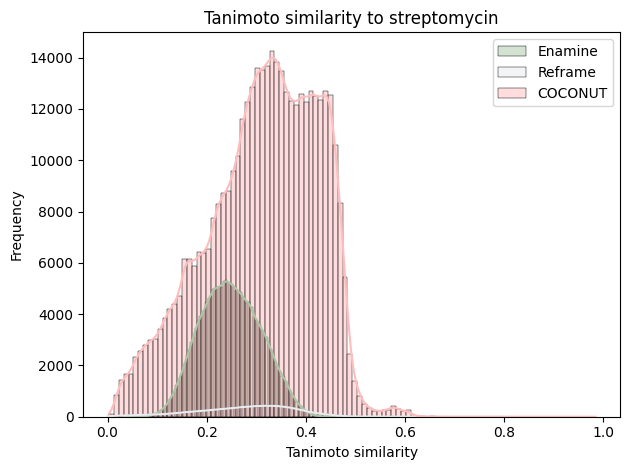

In [22]:
sns.histplot(
    enamine_df["tanimoto_streptomycin"],
    kde=True,
    bins=100,
    color="#abc6a6",
    alpha=0.5,
    label="Enamine",
)
sns.histplot(
    reframe_df["tanimoto_streptomycin"],
    kde=True,
    bins=100,
    color="#e7ecf0",
    alpha=0.5,
    label="Reframe",
)
sns.histplot(
    coconut_df["tanimoto_streptomycin"],
    kde=True,
    bins=100,
    color="#ffbdbe",
    alpha=0.5,
    label="COCONUT",
)
plt.xlabel("Tanimoto similarity")
plt.ylabel("Frequency")
plt.legend()
plt.title("Tanimoto similarity to streptomycin")
plt.savefig("../figures/tanimoto_streptomycin.jpg", dpi=400)
plt.tight_layout()
plt.show()